Saved 85 records to museums.db
Fetching and storing city population data...
Updated Paris population: 7070000
Updated Beijing population: 18960744
No population found for city: Vatican City, Rome
Updated London population: 8961989
Updated New York City population: 19006798
Updated Nanjing population: 9314685
Updated Suzhou population: 6715559
Updated Washington, D.C. population: 702250
Updated Wuhan population: 10392693
Updated Seoul population: 10349312
Updated Mexico City population: 12294193
Updated Saint Petersburg population: 5351935
No population found for city: London, South Kensington
Updated Madrid population: 7009268
Updated Konya population: 2296347
Updated Chengdu population: 13568357
Updated Tehran population: 44099591
Updated Florence population: 1011349
Updated Taichung population: 2819798
Updated Hong Kong population: 7491609
Updated Changzhou population: 3290918
Updated Keelung population: 397515
Updated Hangzhou population: 9236032
Updated Amsterdam population: 880419

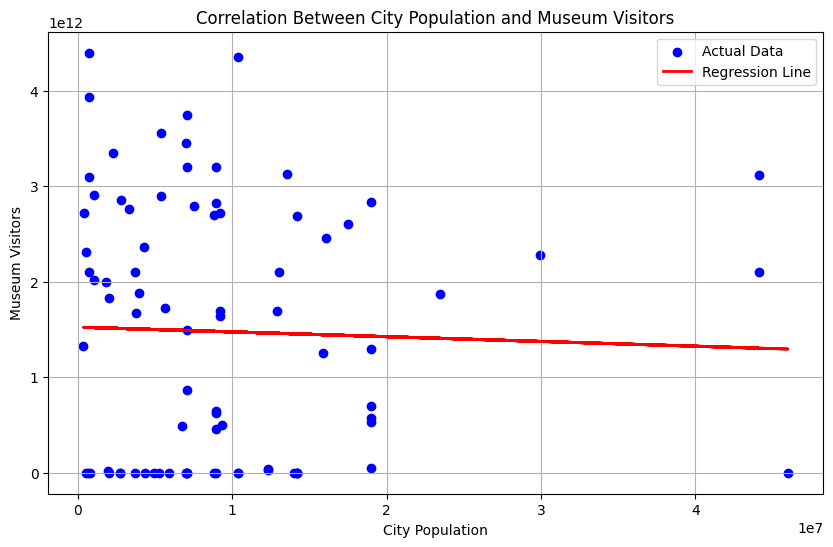

Intercept: 1525227754270.155
Coefficient (Population): -4990.964492792098
R^2 score: 0.001167582679942769


In [1]:
# regression_analysis.ipynb

# ---
# 1. Imports
# ---
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Import your local scripts (must be in the same folder)
import collect_wiki_mesuemx
import collect_city_population

#GEONAMES_USERNAME = "yjjianggeonamedb"
wikipedia_url = "https://en.wikipedia.org/wiki/List_of_most_visited_museums"

# ---
# 2. Run data collection scripts
# ---
print("Collecting museum data from Wikipedia...")
collect_wiki_mesuemx.fetch_and_store_museum_data(wikipedia_url)

print("Fetching and storing city population data...")
collect_city_population.update_city_populations()


# ---
# 3. Load data from SQLite
# ---
conn = sqlite3.connect("museums.db")
df = pd.read_sql_query("SELECT name, visitors, city, country, Population FROM museums", conn)
conn.close()

# Drop rows with missing population or visitors
df = df.dropna(subset=["Population", "visitors"])

print(f"Loaded {len(df)} records after cleaning.")


# ---
# 4. Prepare data for regression
# ---
X = df[["Population"]].values
y = df["visitors"].values

# Create and fit model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)


# ---
# 5. Visualize results
# ---
plt.figure(figsize=(10, 6))
plt.scatter(df["Population"], df["visitors"], color="blue", label="Actual Data")
plt.plot(df["Population"], y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("City Population")
plt.ylabel("Museum Visitors")
plt.title("Correlation Between City Population and Museum Visitors")
plt.legend()
plt.grid(True)
plt.show()


# ---
# 6. Display regression stats
# ---
print("Intercept:", model.intercept_)
print("Coefficient (Population):", model.coef_[0])
print("R^2 score:", model.score(X, y))

